### 目标

从安然公司的电子文档中，找出它商业犯罪的证据。传统的方法是“关键词+人工识别”，来找出与商业犯罪相关的证据。新的分析方法是**Predictive Coding**，先人工为一些文档打标签，随后用文本分析模型进行预测。

In [1]:
emails = read.csv("./data/energy_bids.csv", stringsAsFactors=FALSE)
str(emails)

'data.frame':	855 obs. of  2 variables:
 $ email     : chr  "North America's integrated electricity market requires cooperation on environmental policies Commission for Environmental Coope"| __truncated__ "FYI -----Original Message----- From: \t\"Ginny Feliciano\" <gfeliciano@earthlink.net>@ENRON [mailto:IMCEANOTES-+22Ginny+20Felic"| __truncated__ "14:13:53 Synchronizing Mailbox 'Kean, Steven J.' 14:13:53 Synchronizing Hierarchy 14:13:53 Synchronizing Favorites 14:13:53 Syn"| __truncated__ "^ ----- Forwarded by Steven J Kean/NA/Enron on 03/02/2001 12:27 PM ----- Suzanne_Nimocks@mckinsey.com Sent by: Carol_Benter@mck"| __truncated__ ...
 $ responsive: int  0 1 0 1 0 0 1 0 0 0 ...


In [3]:
strwrap(emails$email[1])

[1] "North America's integrated electricity market requires cooperation on"                      
 [2] "environmental policies Commission for Environmental Cooperation"                            
 [3] "releases working paper on North America's electricity market Montreal,"                     
 [4] "27 November 2001 -- The North American Commission for Environmental"                        
 [5] "Cooperation (CEC) is releasing a working paper highlighting the trend"                      
 [6] "towards increasing trade, competition and cross-border investment in"                       
 [7] "electricity between Canada, Mexico and the United States. It is hoped"                      
 [8] "that the working paper, Environmental Challenges and Opportunities in"                      
 [9] "the Evolving North American Electricity Market, will stimulate public"                      
[10] "discussion around a CEC symposium of the same title about the need to"                      
[11] "coordinate environmental policies trinationally as a North America-wide"                    
[12] "electricity market develops. The CEC symposium will take place in San"                      
[13] "Diego on 29-30 November, and will bring together leading experts from"                      
[14] "industry, academia, NGOs and the governments of Canada, Mexico and the"                     
[15] "United States to consider the impact of the evolving continental"                           
[16] "electricity market on human health and the environment. \"Our goal [with"                   
[17] "the working paper and the symposium] is to highlight key environmental"                     
[18] "issues that must be addressed as the electricity markets in North"                          
[19] "America become more and more integrated,\" said Janine Ferretti,"                           
[20] "executive director of the CEC. \"We want to stimulate discussion around"                    
[21] "the important policy questions being raised so that countries can"                          
[22] "cooperate in their approach to energy and the environment.\" The CEC, an"                   
[23] "international organization created under an environmental side"                             
[24] "agreement to NAFTA known as the North American Agreement on"                                
[25] "Environmental Cooperation, was established to address regional"                             
[26] "environmental concerns, help prevent potential trade and environmental"                     
[27] "conflicts, and promote the effective enforcement of environmental law."                     
[28] "The CEC Secretariat believes that greater North American cooperation on"                    
[29] "environmental policies regarding the continental electricity market is"                     
[30] "necessary to: * protect air quality and mitigate climate change, *"                         
[31] "minimize the possibility of environment-based trade disputes, * ensure"                     
[32] "a dependable supply of reasonably priced electricity across North"                          
[33] "America * avoid creation of pollution havens, and * ensure local and"                       
[34] "national environmental measures remain effective. The Changing Market"                      
[35] "The working paper profiles the rapid changing North American"                               
[36] "electricity market. For example, in 2001, the US is projected to export"                    
[37] "13.1 thousand gigawatt-hours (GWh) of electricity to Canada and Mexico."                    
[38] "By 2007, this number is projected to grow to 16.9 thousand GWh of"                          
[39] "electricity. \"Over the past few decades, the North American electricity"                   
[40] "market has developed into a complex array of cross-border transactions"                     
[41] "and relationships,\" said Phil Shar

In [4]:
emails$responsive[1]

[1] 0

In [5]:
strwrap(emails$email[2])

[1] "FYI -----Original Message----- From: \"Ginny Feliciano\""                                          
 [2] "<gfeliciano@earthlink.net>@ENRON"                                                                  
 [3] "[mailto:IMCEANOTES-+22Ginny+20Feliciano+22+20+3Cgfeliciano+40earthlink+2Enet+3E+40ENRON@ENRON.com]"
 [4] "Sent: Thursday, June 28, 2001 3:40 PM To: Silvia Woodard; Paul Runci;"                             
 [5] "Katrin Thomas; John A. Riggs; Kurt E. Yeager; Gregg Ward; Philip K."                               
 [6] "Verleger; Admiral Richard H. Truly; Susan Tomasky; Tsutomu Toichi;"                                
 [7] "Susan F. Tierney; John A. Strom; Gerald M. Stokes; Kevin Stoffer;"                                 
 [8] "Edward M. Stern; Irwin M. Stelzer; Hoff Stauffer; Steven R. Spencer;"                              
 [9] "Robert Smart; Bernie Schroeder; George A. Schreiber, Jr.; Robert N."                               
[10] "Schock; James R. Schlesinger; Roger W. Sant; John W. Rowe; James E."                               
[11] "Rogers; John F. Riordan; James Ragland; Frank J. Puzio; Tony Prophet;"                             
[12] "Robert Priddle; Michael Price; John B. Phillips; Robert Perciasepe; D."                            
[13] "Louis Peoples; Robert Nordhaus; Walker Nolan; William A. Nitze;"                                   
[14] "Kazutoshi Muramatsu; Ernest J. Moniz; Nancy C. Mohn; Callum McCarthy;"                             
[15] "Thomas R. Mason; Edward P. Martin; Jan W. Mares; James K. Malernee; S."                            
[16] "David Freeman; Edwin Lupberger; Amory B. Lovins; Lynn LeMaster; Hoesung"                           
[17] "Lee; Lay, Kenneth; Lester Lave; Wilfrid L. Kohl; Soo Kyung Kim; Melanie"                           
[18] "Kenderdine; Paul L. Joskow; Ira H. Jolles; Frederick E. John; John"                                
[19] "Jimison; William W. Hogan; Robert A. Hefner, III; James K. Gray; Craig"                            
[20] "G. Goodman; Charles F. Goff, Jr.; Jerry D. Geist; Fritz Gautschi; Larry"                           
[21] "G. Garberding; Roger Gale; William Fulkerson; Stephen E. Frank; George"                            
[22] "Frampton; Juan Eibenschutz; Theodore R. Eck; Congressman John Dingell;"                            
[23] "Brian N. Dickie; William E. Dickenson; Etienne Deffarges; Wilfried"                                
[24] "Czernie; Loren C. Cox; Anne Cleary; Bernard H. Cherry; Red Cavaney;"                               
[25] "Ralph Cavanagh; Thomas R. Casten; Peter Bradford; Peter D. Blair; Ellen"                           
[26] "Berman; Roger A. Berliner; Michael L. Beatty; Vicky A. Bailey; Merribel"                           
[27] "S. Ayres; Catherine G. Abbott Subject: Energy Deregulation - California"                           
[28] "State Auditor Report Attached is my report prepared on behalf of the"                              
[29] "California State Auditor. I look forward to seeing you at The Aspen"                               
[30] "Institute Energy Policy Forum. Charles J. Cicchetti Pacific Economics"                             
[31] "Group, LLC - ca report new.pdf ***********"

In [6]:
emails$responsive[2]

[1] 1

In [7]:
table(emails$responsive)


  0   1 
716 139 

In [8]:
library(tm)

Loading required package: NLP


In [9]:
corpus = Corpus(VectorSource(emails$email))

In [10]:
strwrap(corpus[[1]])

[1] "North America's integrated electricity market requires cooperation on"                      
 [2] "environmental policies Commission for Environmental Cooperation"                            
 [3] "releases working paper on North America's electricity market Montreal,"                     
 [4] "27 November 2001 -- The North American Commission for Environmental"                        
 [5] "Cooperation (CEC) is releasing a working paper highlighting the trend"                      
 [6] "towards increasing trade, competition and cross-border investment in"                       
 [7] "electricity between Canada, Mexico and the United States. It is hoped"                      
 [8] "that the working paper, Environmental Challenges and Opportunities in"                      
 [9] "the Evolving North American Electricity Market, will stimulate public"                      
[10] "discussion around a CEC symposium of the same title about the need to"                      
[11] "coordinate environmental policies trinationally as a North America-wide"                    
[12] "electricity market develops. The CEC symposium will take place in San"                      
[13] "Diego on 29-30 November, and will bring together leading experts from"                      
[14] "industry, academia, NGOs and the governments of Canada, Mexico and the"                     
[15] "United States to consider the impact of the evolving continental"                           
[16] "electricity market on human health and the environment. \"Our goal [with"                   
[17] "the working paper and the symposium] is to highlight key environmental"                     
[18] "issues that must be addressed as the electricity markets in North"                          
[19] "America become more and more integrated,\" said Janine Ferretti,"                           
[20] "executive director of the CEC. \"We want to stimulate discussion around"                    
[21] "the important policy questions being raised so that countries can"                          
[22] "cooperate in their approach to energy and the environment.\" The CEC, an"                   
[23] "international organization created under an environmental side"                             
[24] "agreement to NAFTA known as the North American Agreement on"                                
[25] "Environmental Cooperation, was established to address regional"                             
[26] "environmental concerns, help prevent potential trade and environmental"                     
[27] "conflicts, and promote the effective enforcement of environmental law."                     
[28] "The CEC Secretariat believes that greater North American cooperation on"                    
[29] "environmental policies regarding the continental electricity market is"                     
[30] "necessary to: * protect air quality and mitigate climate change, *"                         
[31] "minimize the possibility of environment-based trade disputes, * ensure"                     
[32] "a dependable supply of reasonably priced electricity across North"                          
[33] "America * avoid creation of pollution havens, and * ensure local and"                       
[34] "national environmental measures remain effective. The Changing Market"                      
[35] "The working paper profiles the rapid changing North American"                               
[36] "electricity market. For example, in 2001, the US is projected to export"                    
[37] "13.1 thousand gigawatt-hours (GWh) of electricity to Canada and Mexico."                    
[38] "By 2007, this number is projected to grow to 16.9 thousand GWh of"                          
[39] "electricity. \"Over the past few decades, the North American electricity"                   
[40] "market has developed into a complex array of cross-border transactions"                     
[41] "and relationships,\" said Phil Shar

In [13]:
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)

In [14]:
strwrap(corpus[[1]])

[1] "north america integr electr market requir cooper environ polici commiss"     
 [2] "environ cooper relea work paper north america electr market montreal 27"     
 [3] "novemb 2001 north american commiss environ cooper cec relea work paper"      
 [4] "highlight trend toward increa trade competit crossbord invest electr"        
 [5] "canada mexico unit state hope work paper environ challeng opportun"          
 [6] "evolv north american electr market will stimul public discuss around"        
 [7] "cec symposium titl need coordin environ polici trinat north americawid"      
 [8] "electr market develop cec symposium will take place san diego 2930"          
 [9] "novemb will bring togeth lead expert industri academia ngos govern"          
[10] "canada mexico unit state consid impact evolv contin electr market human"     
[11] "health environ goal work paper symposium highlight key environ issu"         
[12] "must address electr market north america becom integr said janin"            
[13] "ferretti execut director cec want stimul discuss around import polici"       
[14] "question rai countri can cooper approach energi environ cec intern"          
[15] "organ creat environ side agreement nafta known north american agreement"     
[16] "environ cooper establish address region environ concern help prevent"        
[17] "potenti trade environ conflict promot effect enforc environ law cec"         
[18] "secretariat believ greater north american cooper environ polici regard"      
[19] "contin electr market necessari protect air qualiti mitig climat chang"       
[20] "minim possibl environmentba trade disput ensur depend suppli reason"         
[21] "price electr across north america avoid creation pollut haven ensur"         
[22] "local nation environ measur remain effect chang market work paper"           
[23] "profil rapid chang north american electr market exampl 2001 us project"      
[24] "export 131 thousand gigawatthour gwh electr canada mexico 2007 number"       
[25] "project grow 169 thousand gwh electr past decad north american electr"       
[26] "market develop complex array crossbord transact relationship said phil"      
[27] "sharp former us congressman chairman cec electr advisori board need"         
[28] "achiev new level cooper environ approach well environ profil electr"         
[29] "sector electr sector singl largest sourc nation report toxin unit state"     
[30] "canada larg sourc mexico us electr sector emit approxim 25 percent nox"      
[31] "emiss rough 35 percent co2 emiss 25 percent mercuri emiss almost 70"         
[32] "percent so2 emiss emiss larg impact airsh watersh migratori speci"           
[33] "corridor often share three north american countri want discuss possibl"      
[34] "outcom greater effort coordin feder state provinci environ law polici"       
[35] "relat electr sector said ferretti can develop compat environ approach"       
[36] "help make domest environ polici effect effect integrat electr market"        
[37] "one key issu rai paper effect market integr competit particular fuel"        
[38] "coal natur gas renew fuel choic larg determin environ impact specif"         
[39] "facil along pollut control technolog perform standard regul paper"           
[40] "highlight impact high competit market well exampl concern call pollut"       
[41] "haven ari signif differ environ law enforc practic induc power compani"      
[42] "locat oper jurisdict lower standard cec secretariat explor addit"            
[43] "environ polici will work restructur market polici can adapt ensur"           
[44] "enhanc competit benefit entir region said sharp becaus trade rule"           
[45] "polici measur direct influenc variabl drive success integr north"            
[46] "american electr market work paper also address fuel choic technolog"         
[47] "pollut control strategi subsidi cec will use inform gather discuss"          
[48] "period develop final report will submit council

In [15]:
dtm = DocumentTermMatrix(corpus)
dtm

<<DocumentTermMatrix (documents: 855, terms: 22319)>>
Non-/sparse entries: 102917/18979828
Sparsity           : 99%
Maximal term length: 168
Weighting          : term frequency (tf)

In [16]:
dtm = removeSparseTerms(dtm, 0.97)
dtm

<<DocumentTermMatrix (documents: 855, terms: 787)>>
Non-/sparse entries: 51493/621392
Sparsity           : 92%
Maximal term length: 19
Weighting          : term frequency (tf)

In [17]:
labeledTerms = as.data.frame(as.matrix(dtm))
labeledTerms$responsive = emails$responsive
str(labeledTerms)

'data.frame':	855 obs. of  788 variables:
 $ 100                : num  0 0 0 0 0 0 5 0 0 0 ...
 $ 1400               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 1999               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2000               : num  0 0 1 0 1 0 2 0 1 0 ...
 $ 2001               : num  2 1 0 0 0 0 7 0 0 0 ...
 $ 713                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 77002              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ abl                : num  0 0 0 0 0 0 2 0 0 0 ...
 $ accept             : num  0 0 0 0 0 0 1 0 0 0 ...
 $ access             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ accord             : num  0 0 0 0 0 0 1 0 0 0 ...
 $ account            : num  0 0 0 0 0 0 3 0 0 0 ...
 $ act                : num  0 0 0 0 0 0 1 0 0 0 ...
 $ action             : num  0 0 0 0 1 0 0 0 0 0 ...
 $ activ              : num  0 0 1 0 1 0 1 0 0 0 ...
 $ actual             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ add                : num  0 0 0 0 0 0 1 0 0 0 ...
 $ addit              : num  1 0 0 0 0 0 1 0 0 0 ...
 $ a

In [18]:
library(caTools)
set.seed(144)
split = sample.split(labeledTerms$responsive, 0.7)
train = subset(labeledTerms, split==TRUE)
test = subset(labeledTerms, split==FALSE)

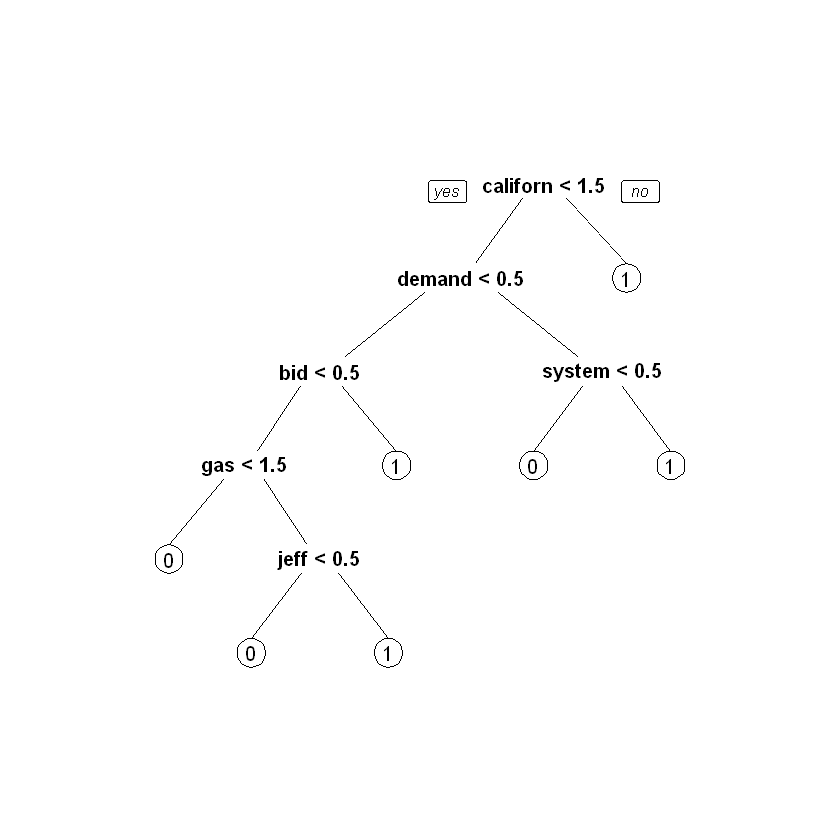

In [19]:
library(rpart)
library(rpart.plot)
emailCART = rpart(responsive~., data=train, method="class")
prp(emailCART)

In [20]:
pred = predict(emailCART, newdata=test)
pred[1:10,]

,0,1
character(0),0.2156863,0.7843137
character(0).1,0.95575221,0.04424779
character(0).2,0.95575221,0.04424779
character(0).3,0.8125,0.1875
character(0).4,0.4,0.6
character(0).5,0.95575221,0.04424779
character(0).6,0.95575221,0.04424779
character(0).7,0.95575221,0.04424779
character(0).8,0.125,0.875
character(0).9,0.125,0.875


In [21]:
pred.prob = pred[,2]
table(test$responsive, pred.prob >= 0.5)

   
    FALSE TRUE
  0   195   20
  1    17   25

In [22]:
(195+25)/(195+20+17+25)

[1] 0.8560311

基准模型

In [23]:
table(test$responsive)


  0   1 
215  42 

In [24]:
215/(215+42)

[1] 0.8365759

在本应用中，“预测为相关，而实际为无关”是可以接受的错误，因为被预测为相关的文档会被人工审查。而“预测为无关，实则相关”（false negative）是难以接受的错误。因此需要对FN施加更大的惩罚。

In [25]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



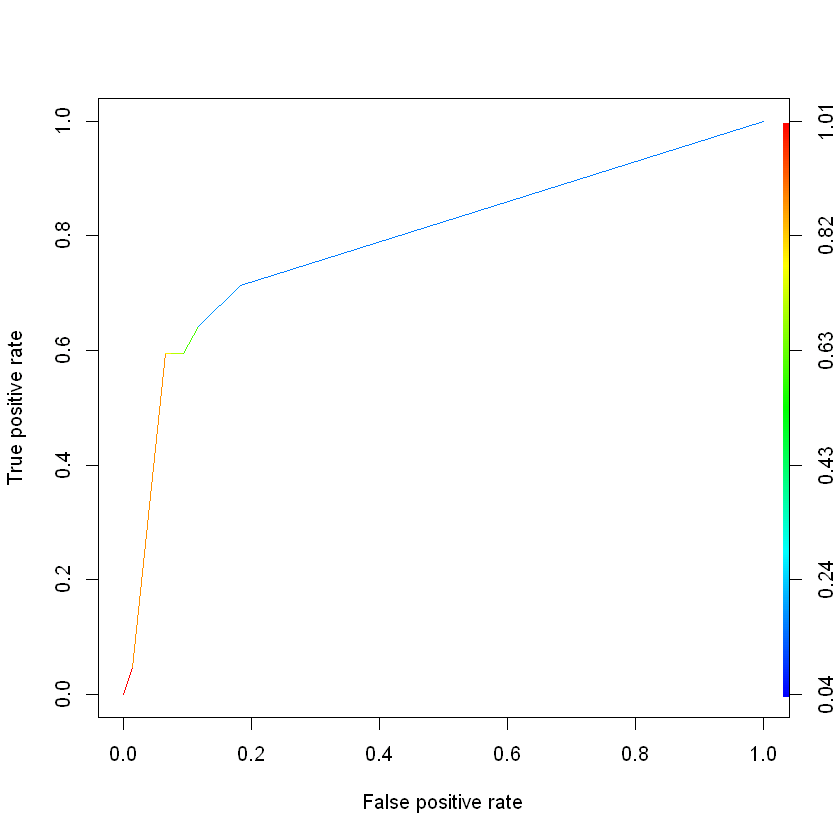

In [28]:
predROCR = prediction(pred.prob, test$responsive)
perfROCR = performance(predROCR, "tpr", "fpr")
plot(perfROCR, colorize=TRUE)

In [29]:
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.7936323